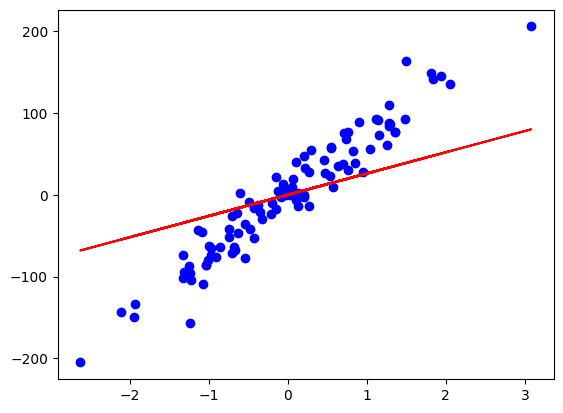

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_regression

# 生成隨機數據
X, y = make_regression(n_samples=100, n_features=1, noise=20, bias=1)
X = X.flatten()
y = y.flatten()

# 初始化模型參數
w = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

# 模型預測函數
def predict(X):
    return w * X + b

# 損失函數
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# 訓練數據和圖形初始化
fig, ax = plt.subplots()
plt.scatter(X, y, color='blue')
line, = ax.plot(X, predict(X), color='red')

# 更新函數
def update(epoch):
    with tf.GradientTape() as tape:
        y_pred = predict(X)
        loss_value = loss(y, y_pred)
    grads = tape.gradient(loss_value, [w, b])
    w.assign_sub(0.1 * grads[0])
    b.assign_sub(0.1 * grads[1])
    line.set_ydata(predict(X))
    return line,

# 動畫
ani = FuncAnimation(fig, update, frames=np.arange(0, 100), blit=True)
plt.show()
